## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [2]:
!pip install tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/80/6f/57d36f6507e432d7fc1956b2e9e8530c5c2d2bfcd8821bcbfae271cd6688/tensorflow-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/ad/6e/1bfe367855dd87467564f7bf9fa14f3b17889988e79598bc37bf18f5ffb6/tensorflow_intel-2.14.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  

In [3]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [225, 225]

train_path = r'C:\Users\abc\Downloads\lungs\train'
valid_path = r'C:\Users\abc\Downloads\lungs\test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




58889256/58889256 [==============================] - 5s 0us/step


In [7]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [118]:
  # useful for getting number of output classes
folders = glob(r'C:\Users\abc\Downloads\lungs\train\*')
len(folders)

2

In [115]:
# import os
# items = os.listdir(r'C:\Users\abc\Downloads\lungs\train')
# items

['negative', 'positive']

In [116]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [119]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [61]:

# view the structure of the model
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 225, 225, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 225, 225, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 225, 225, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [62]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [63]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
data = ImageDataGenerator(rescale = 1/255.0,validation_split=0.2) # herevalidadation split means test split

trainData = data.flow_from_directory(directory = "/content/drive/MyDrive/lungs data", target_size=(200, 200),class_mode='binary', batch_size=32,shuffle=True, subset = "training")
testData = data.flow_from_directory(directory = "/content/drive/MyDrive/lungs data", target_size=(200, 200),class_mode='binary', batch_size=32,shuffle=True, subset = "validation")

In [64]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'C:\Users\abc\Downloads\lungs\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 374 images belonging to 2 classes.


In [65]:
test_set = test_datagen.flow_from_directory(r'C:\Users\abc\Downloads\lungs\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 160 images belonging to 2 classes.


In [66]:
# fit the model
# Run the cell. It will take some time to execute
# r = model.fit_generator(training_set,validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),
# validation_steps=len(test_set))



r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


C:\Users\abc\AppData\Local\Temp\ipykernel_10632\1223450674.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
12/12 [==============================] - 64s 5s/step - loss: 1.4574 - accuracy: 0.5508 - val_loss: 1.2298 - val_accuracy: 0.4625
Epoch 2/5
12/12 [==============================] - 62s 5s/step - loss: 0.5288 - accuracy: 0.7701 - val_loss: 0.6861 - val_accuracy: 0.6812
Epoch 3/5
12/12 [==============================] - 62s 5s/step - loss: 0.2899 - accuracy: 0.8743 - val_loss: 0.2382 - val_accuracy: 0.9000
Epoch 4/5
12/12 [==============================] - 62s 5s/step - loss: 0.2640 - accuracy: 0.8717 - val_loss: 0.2448 - val_accuracy: 0.9125
Epoch 5/5
12/12 [==============================] - 63s 5s/step - loss: 0.2064 - accuracy: 0.9064 - val_loss: 0.2518 - val_accuracy: 0.9000


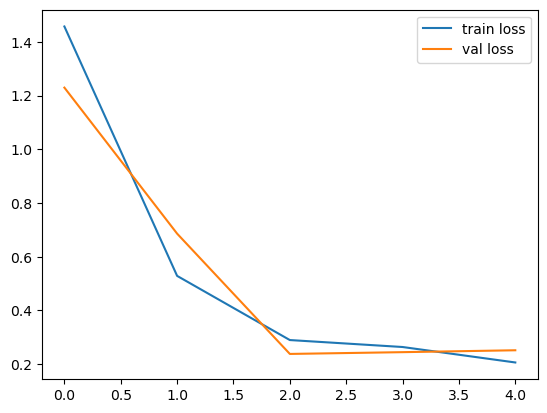

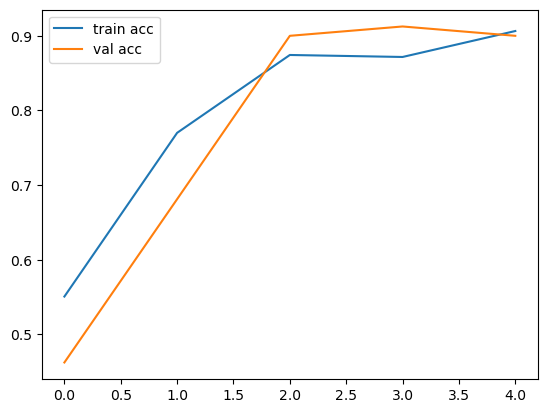

<Figure size 640x480 with 0 Axes>

In [68]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# # plot the accuracy
# plt.plot(r.history['acc'], label='train acc')
# plt.plot(r.history['val_acc'], label='val acc')
# plt.legend()
# plt.show()




# Plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')  # Change 'acc' to 'accuracy'
plt.plot(r.history['val_accuracy'], label='val acc')  # Change 'val_acc' to 'val_accuracy'
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [72]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [83]:
# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples

from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3




### checking our model for an image

In [84]:
from keras.preprocessing import image
model=load_model("model_vgg16.h5")

In [120]:
img=image.load_img(r'C:\Users\abc\Downloads\lungs\person155_bacteria_730.jpeg', target_size=(225,225))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data = preprocess_input(x)  # Fix the function name to 'preprocess_input'

classes=model.predict(img_data)
classes


1/1 [==============================] - 0s 266ms/step


array([[0.88828367, 0.1117163 ]], dtype=float32)

In [121]:
class_labels=('negative','positive')

In [122]:
class_labels[classes.argmax()]

'negative'

In [101]:
classes.argmax()

1